In [1]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch

In [12]:
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import torch
import os
from tqdm import tqdm

In [15]:
from huggingface_hub import snapshot_download

# This will force a clean re-download of the model
snapshot_download("runwayml/stable-diffusion-inpainting", force_download=True)


Fetching 27 files:   0%|          | 0/27 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

sd-v1-5-inpainting.ckpt:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

'C:\\Users\\rasha\\.cache\\huggingface\\hub\\models--runwayml--stable-diffusion-inpainting\\snapshots\\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb'

In [16]:
from diffusers import StableDiffusionInpaintPipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting").to("cuda" if torch.cuda.is_available() else "cpu")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\vae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [2]:
from PIL import Image
from tqdm import tqdm
import os
from diffusers import StableDiffusionInpaintPipeline
import torch

# Load model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting"
).to("cuda" if torch.cuda.is_available() else "cpu")

# Set paths
input_dir = "./my_tiles/masked"
mask_dir = "./my_tiles/masks"
output_dir = "./my_tiles/results"
prompt = "a cracked ceramic tile surface"

os.makedirs(output_dir, exist_ok=True)

# Run inpainting
for fname in tqdm(os.listdir(input_dir)):
    if not fname.endswith(".png"):
        continue

    image = Image.open(os.path.join(input_dir, fname)).convert("RGB").resize((512, 512))
    mask = Image.open(os.path.join(mask_dir, fname)).convert("L").resize((512, 512))

    result = pipe(prompt=prompt, image=image, mask_image=mask).images[0]
    result.save(os.path.join(output_dir, fname))


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\vae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\rasha\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting\snapshots\8a4288a76071f7280aedbdb3253bdb9e9d5d84bb\vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
  0%|          | 0/17 [00:00<?

  0%|          | 0/50 [00:00<?, ?it/s]

  6%|▌         | 1/17 [27:40<7:22:46, 1660.39s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 12%|█▏        | 2/17 [59:43<7:33:45, 1815.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 18%|█▊        | 3/17 [1:26:46<6:43:00, 1727.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 24%|██▎       | 4/17 [1:56:47<6:20:32, 1756.31s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 29%|██▉       | 5/17 [2:21:28<5:31:26, 1657.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 35%|███▌      | 6/17 [2:38:51<4:25:32, 1448.40s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 41%|████      | 7/17 [2:58:12<3:45:42, 1354.28s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 47%|████▋     | 8/17 [3:15:55<3:09:14, 1261.61s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 53%|█████▎    | 9/17 [3:33:46<2:40:16, 1202.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 59%|█████▉    | 10/17 [3:52:00<2:16:20, 1168.66s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 65%|██████▍   | 11/17 [4:11:19<1:56:34, 1165.69s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 71%|███████   | 12/17 [4:35:51<1:44:54, 1258.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 76%|███████▋  | 13/17 [4:54:14<1:20:46, 1211.61s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 82%|████████▏ | 14/17 [5:11:32<57:57, 1159.09s/it]  

  0%|          | 0/50 [00:00<?, ?it/s]

 88%|████████▊ | 15/17 [5:28:43<37:21, 1120.56s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 94%|█████████▍| 16/17 [5:45:21<18:03, 1083.77s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 17/17 [6:02:21<00:00, 1278.93s/it]


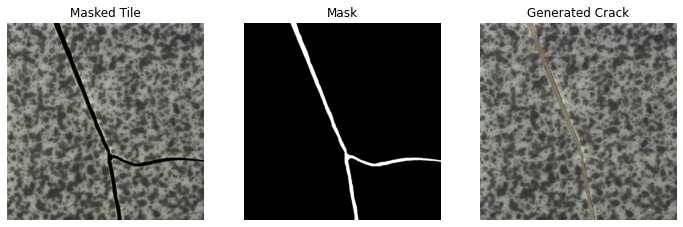

In [3]:
import matplotlib.pyplot as plt

sample_fname = os.listdir(output_dir)[0]

original = Image.open(os.path.join(input_dir, sample_fname))
mask = Image.open(os.path.join(mask_dir, sample_fname))
result = Image.open(os.path.join(output_dir, sample_fname))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(original)
plt.title("Masked Tile")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(result)
plt.title("Generated Crack")
plt.axis("off")

plt.show()


In [13]:
import importlib.util
import sys

clip_path = "./venv/lib/site-packages/clip"  # adjust this if needed, or skip if pip install worked globally

spec = importlib.util.find_spec("clip")
if spec is None:
    raise ImportError("OpenAI clip module not found. Did you install it with pip?")
else:
    openai_clip = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(openai_clip)



In [14]:
import os
import numpy as np
import torch
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import lpips
from torchvision.transforms import ToTensor
from skimage.transform import resize
from tqdm import tqdm
import importlib.util

# Load OpenAI CLIP using importlib
spec = importlib.util.find_spec("clip")
if spec is None:
    raise ImportError("OpenAI clip module not found. Did you install it with pip?")
else:
    openai_clip = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(openai_clip)

# Load CLIP and LPIPS
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = openai_clip.load("ViT-B/32", device=device)
clip_model.eval()

lpips_model = lpips.LPIPS(net='alex').to(device).eval()

# Set paths
gen_dir = "./my_tiles/results"
real_dir = "./tile/tile/test/crack"
mask_dir = "./tile/tile/ground_truth/crack"

# Prompt
prompt = "a cracked ceramic tile surface"
text_tokens = openai_clip.tokenize([prompt]).to(device)

# Image size for evaluation
image_size = (256, 256)

# Prepare result containers
ssim_scores = []
l1_scores = []
lpips_scores = []
clip_scores = []

# Evaluate on first 10 files
files = sorted([f for f in os.listdir(gen_dir) if f.endswith(".png")])[:10]

for fname in tqdm(files):
    # Load generated image
    gen = Image.open(os.path.join(gen_dir, fname)).convert("RGB").resize(image_size)
    gen_np = np.array(gen).astype(np.float32) / 255.0

    # Load real cracked image
    real_path = os.path.join(real_dir, fname)
    if not os.path.exists(real_path): continue
    real = Image.open(real_path).convert("RGB").resize(image_size)
    real_np = np.array(real).astype(np.float32) / 255.0

    # Load mask
    mask_path = os.path.join(mask_dir, fname.replace(".png", "_mask.png"))
    if not os.path.exists(mask_path): continue
    mask = Image.open(mask_path).convert("L").resize(image_size)
    mask_np = (np.array(mask).astype(np.float32) / 255.0) > 0.5
    mask_np = np.expand_dims(mask_np, axis=-1)

    # SSIM
    ssim_val = ssim(real_np, gen_np, channel_axis=-1, data_range=1.0)
    ssim_scores.append(ssim_val)

    # L1 (masked)
    l1_val = np.mean(np.abs((real_np - gen_np) * mask_np))
    l1_scores.append(l1_val)

    # LPIPS
    real_tensor = torch.tensor(real_np.transpose(2, 0, 1)).unsqueeze(0).float().to(device)
    gen_tensor = torch.tensor(gen_np.transpose(2, 0, 1)).unsqueeze(0).float().to(device)
    mask_tensor = torch.tensor(mask_np.transpose(2, 0, 1)).unsqueeze(0).float().to(device)
    with torch.no_grad():
        lpips_val = lpips_model(real_tensor * mask_tensor, gen_tensor * mask_tensor).item()
    lpips_scores.append(lpips_val)

    # CLIP
    clip_input = clip_preprocess(gen).unsqueeze(0).to(device)
    with torch.no_grad():
        image_feat = clip_model.encode_image(clip_input)
        text_feat = clip_model.encode_text(text_tokens)
        sim = torch.nn.functional.cosine_similarity(image_feat, text_feat).item()
    clip_scores.append(sim)

# Print results
print("\nEvaluation Results (on 10 samples):")
print("Average SSIM:", np.mean(ssim_scores))
print("Average Masked L1:", np.mean(l1_scores))
print("Average LPIPS:", np.mean(lpips_scores))
print("Average CLIP similarity:", np.mean(clip_scores))


100%|███████████████████████████████████████| 338M/338M [00:42<00:00, 8.23MiB/s]


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\rasha\AppData\Local\Programs\Python\Python310\lib\site-packages\lpips\weights\v0.1\alex.pth


100%|██████████| 10/10 [00:03<00:00,  2.68it/s]


Evaluation Results (on 10 samples):
Average SSIM: 0.90385073
Average Masked L1: 0.006079882
Average LPIPS: 0.046779151726514104
Average CLIP similarity: 0.253851418197155
